In [1]:
#Voglio backtestare la strategia con parametri multipli e vedere come si comporta. Devo applicare la funzione di backtest
#e poi fare un plot dei risultati in 3d.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numba as nb

#Now we import the script from the percentage fees version:
import sys
sys.path.append(r'C:\Users\camere\Conda_3.11_enviroment\PythonMiniTutorials\trading strategies\MyOwnBacktester\main_functions')
import main_func_percentage

In [2]:
data = pd.read_csv(r'C:\Users\camere\Conda_3.11_enviroment\CSV DATA\1min data\eurgbp-m1-bid-2024-01-01-2024-08-22.csv',
                   index_col=0, parse_dates=True)
close_price = data['close'].to_numpy()
print(close_price) #now i got a numpy array with the closing prices of the currency pair;

[0.86692 0.86722 0.86723 ... 0.85203 0.85207 0.852  ]


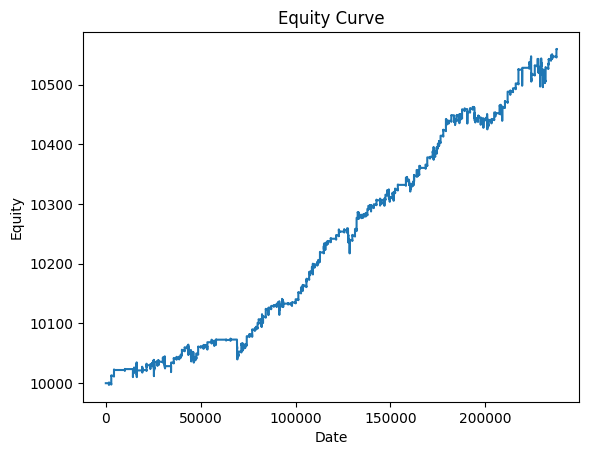

In [3]:
#remember the parameters: data, window, num_std_devs, fees_percentage=0.015, starting_cash=10000

equity = main_func_percentage.backtest_bollinger_bands(data=close_price, window=120,
                                                        num_std_devs=5, fees_percentage=0.015, starting_cash=10000)


equity = pd.Series(equity)
equity.plot()
plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Equity Curve')
plt.show()

In [8]:
#Ok now i wanna generate a grid with parameters and then backtest the strategy with all the possible combinations
#of parameters and then plot the results in a 3d plot.

#We create the grid containing all the possible combinations of parameters:
windows = np.arange(30, 500, 30)
num_std_devs = np.arange(4, 9, 1)

#We create a list of tuples containing all the possible combinations of parameters:
params = [(window, num_std_dev) for window in windows for num_std_dev in num_std_devs]


#We create a list to store the results of the backtest:
results = []

#We loop through all the possible combinations of parameters and store the results in the list:

for window, num_std_dev in params:
    equity = main_func_percentage.backtest_bollinger_bands(data=close_price, window=window,
                                                            num_std_devs=num_std_dev, fees_percentage=0.01, starting_cash=10000)
    results.append(equity[-1])


In [9]:
#THIS IS A DEMONSTRATION OF HOW YOU CAN EXTRACT THE VALUES FROM A LIST OF TUPLES:
for i, j, in params: #he just goes sequentially through the tuples and extracts the values; so first the window,
    print(f'Window: {i}, Num Std Devs: {j}') #then the num of standard deviations.

Window: 30, Num Std Devs: 4
Window: 30, Num Std Devs: 5
Window: 30, Num Std Devs: 6
Window: 30, Num Std Devs: 7
Window: 30, Num Std Devs: 8
Window: 60, Num Std Devs: 4
Window: 60, Num Std Devs: 5
Window: 60, Num Std Devs: 6
Window: 60, Num Std Devs: 7
Window: 60, Num Std Devs: 8
Window: 90, Num Std Devs: 4
Window: 90, Num Std Devs: 5
Window: 90, Num Std Devs: 6
Window: 90, Num Std Devs: 7
Window: 90, Num Std Devs: 8
Window: 120, Num Std Devs: 4
Window: 120, Num Std Devs: 5
Window: 120, Num Std Devs: 6
Window: 120, Num Std Devs: 7
Window: 120, Num Std Devs: 8
Window: 150, Num Std Devs: 4
Window: 150, Num Std Devs: 5
Window: 150, Num Std Devs: 6
Window: 150, Num Std Devs: 7
Window: 150, Num Std Devs: 8
Window: 180, Num Std Devs: 4
Window: 180, Num Std Devs: 5
Window: 180, Num Std Devs: 6
Window: 180, Num Std Devs: 7
Window: 180, Num Std Devs: 8
Window: 210, Num Std Devs: 4
Window: 210, Num Std Devs: 5
Window: 210, Num Std Devs: 6
Window: 210, Num Std Devs: 7
Window: 210, Num Std Devs: 8


In [10]:
import plotly.graph_objects as go

# Extract the values from the params list
window_values = [i[0] for i in params]
num_std_devs_values = [i[1] for i in params]

# Create the scatter plot
fig = go.Figure(data=go.Scatter3d(
    x=window_values,
    y=num_std_devs_values,
    z=results,
    mode='markers',
    marker=dict(
        size=5,
        color=results,
        colorscale='Viridis',
        opacity=0.8
    )
))

# Set the axis labels
fig.update_layout(scene=dict(
    xaxis_title='Window',
    yaxis_title='Num Std Devs',
    zaxis_title='Final Equity'
))

# Show the plot
fig.show()